In [6]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [7]:
ds = xr.open_dataset("zarr-stores/loss.nc")
ds.load()

<xarray.Dataset> Size: 313kB
Dimensions:        (optim_step: 4600, var_index: 11, var_names: 11)
Coordinates:
  * optim_step     (optim_step) int64 37kB 0 1 2 3 4 ... 4596 4597 4598 4599
  * var_index      (var_index) int64 88B 0 1 2 3 4 5 6 7 8 9 10
  * var_names      (var_names) <U7 308B 'SSH' 'icec' ... 'ugrd10m' 'vgrd10m'
Data variables:
    loss           (optim_step) float32 18kB 4.945 5.277 5.167 ... 1.882 1.764
    loss_valid     (optim_step) float32 18kB 5.648 4.668 4.976 ... 2.025 1.903
    loss_by_var    (var_index, optim_step) float32 202kB 1.661 1.707 ... 1.303
    learning_rate  (optim_step) float64 37kB nan nan nan nan ... nan nan nan nan
Attributes:
    batch_size:  16

/tmp/ipykernel_544713/1976551034.py:3: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  stride = int(ds.dims["optim_step"]/epochs)


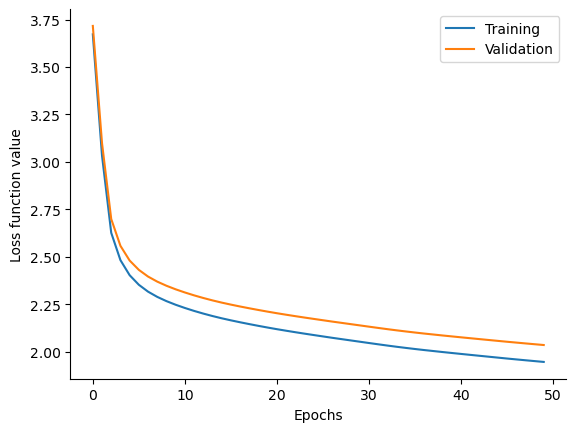

In [9]:
fig, ax = plt.subplots()
epochs = 50
stride = int(ds.dims["optim_step"]/epochs)
loss = [np.mean(ds.loss[stride*i:(i+1)*stride]) for i in range(epochs)]
loss_valid = [np.mean(ds.loss_valid[stride*i:(i+1)*stride]) for i in range(epochs)]

ax.plot(loss, label="Training")
ax.plot(loss_valid, label="Validation")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel("Epochs"); plt.ylabel('Loss function value')
plt.legend()
fig.savefig("loss.png")
plt.show()

/tmp/ipykernel_1189131/505458093.py:5: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  stride = int(ds.dims["optim_step"]/epochs)


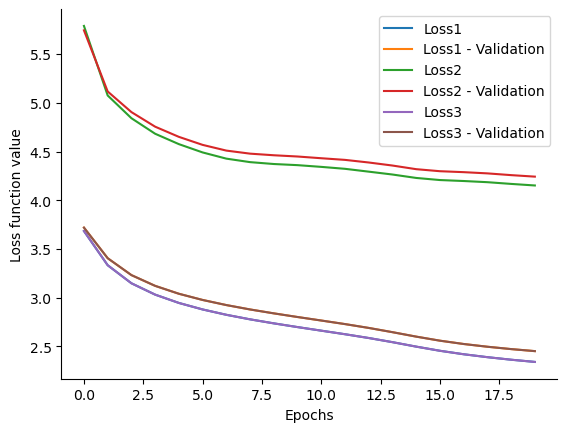

In [4]:
fig, ax = plt.subplots()
epochs = 20

ds = xr.open_dataset("zarr-stores/loss_without_land_prognostic.nc")
stride = int(ds.dims["optim_step"]/epochs)
loss1_train = [np.mean(ds.loss[stride*i:(i+1)*stride]) for i in range(epochs)]
loss1_valid = [np.mean(ds.loss_valid[stride*i:(i+1)*stride]) for i in range(epochs)]

ds = xr.open_dataset("zarr-stores/loss_with_land_prognostic.nc")
loss2_train = [np.mean(ds.loss[stride*i:(i+1)*stride]) for i in range(epochs)]
loss2_valid = [np.mean(ds.loss_valid[stride*i:(i+1)*stride]) for i in range(epochs)]

ds = xr.open_dataset("zarr-stores/loss_without_land_prognostic1.nc")
loss3_train = [np.mean(ds.loss[stride*i:(i+1)*stride]) for i in range(epochs)]
loss3_valid = [np.mean(ds.loss_valid[stride*i:(i+1)*stride]) for i in range(epochs)]

ax.plot(loss1_train, label="Loss1")
ax.plot(loss1_valid, label="Loss1 - Validation")

ax.plot(loss2_train, label="Loss2")
ax.plot(loss2_valid, label="Loss2 - Validation")

ax.plot(loss3_train, label="Loss3")
ax.plot(loss3_valid, label="Loss3 - Validation")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel("Epochs"); plt.ylabel('Loss function value')
plt.legend()
#fig.savefig("loss.png")
plt.show()

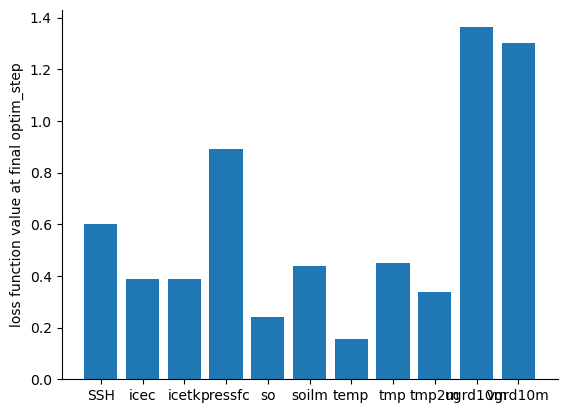

In [4]:
fig, ax = plt.subplots()
plt.bar(
    x=ds.var_index,
    height=ds.loss_by_var.isel(optim_step=-1),
)

ax.set(
    xticks=ds.var_index.values,
    xticklabels=ds.var_names.values,
    ylabel="loss function value at final optim_step",
);

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

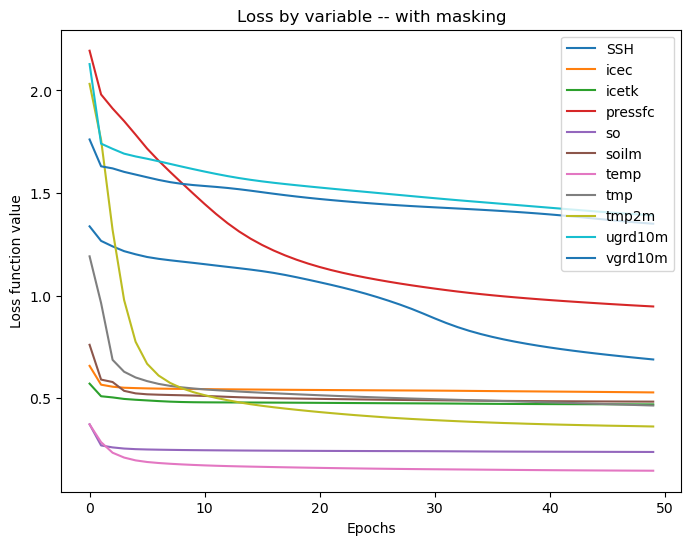

In [5]:
# loss per variable over the number of epochs
loss_by_var = np.zeros((ds.sizes['var_index'], epochs))
for i in range(ds.sizes['var_index']):
    loss_by_var[i,:] = [np.mean(ds.loss_by_var[i, stride*j:(j+1)*stride]) for j in range(epochs)]

fig, ax = plt.subplots(figsize=(8,6))
for i in ds.coords['var_index']:
    ax.plot(loss_by_var[i, :], label=ds.coords['var_names'][i].values)
plt.legend(loc='upper right')
plt.xlabel('Epochs'); plt.ylabel('Loss function value')
plt.title('Loss by variable -- with masking')
#plt.savefig('loss_by_var.png', dpi=300)
plt.show()